# Multinomial NB (catetory var)
* sub opt alpha
    * cv=3, 0~10까지 : 1.87
    * cv=3, 0~1까지 : 0.32
    * cv=5, 0~10까지 : 0.16
    * cv=5, 0~1까지 : 0.15

In [1]:
df = pd.read_csv('../resource/final_df1.csv')
y = df['rating(y)'].values
cat_X = df.ix[:,'0':]
cat_X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1-sigma rule을 적용한 sub_opt alpha값 찾기

In [2]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_absolute_error

### a-1) cv=3, 0~10까지 0.01 step size

best alpha :  2.22
best score :  0.825356009805
   1-sigma :  0.0094
sub_opt score :  0.8348
sub_opt alpha :  1.87


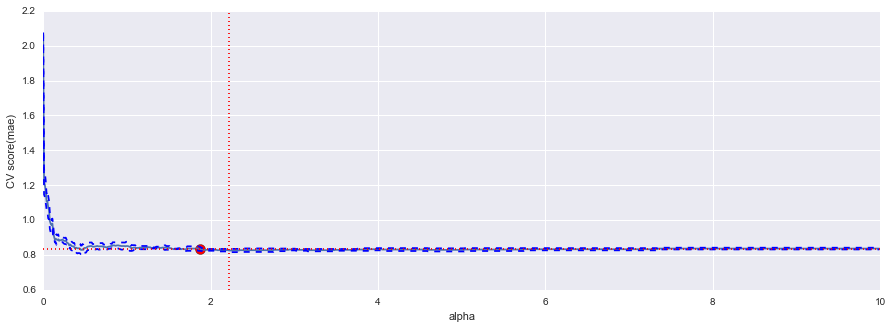

In [3]:
cv = StratifiedKFold(y, n_folds=3, random_state=0)

i_range = []
score_range = []
sigma = []

for a in np.arange(0, 10, 0.01):
    mnb = MultinomialNB(alpha = a)
    #print('alpha :',a)
    
    scores = np.zeros(3)
    
    for i, (train_idx, test_idx) in enumerate(cv):
        X_train = cat_X.ix[train_idx]
        y_train = y[train_idx]
        X_test = cat_X.ix[test_idx]
        y_test = y[test_idx]
        
        mnb.fit(X_train, y_train)
        y_pred = mnb.predict(X_test)
        
        scores[i] = mean_absolute_error(y_test, y_pred)
    #print(' mean :', round(np.mean(scores), 4),"   ", scores)
    #print('--------------------------------------------------------')
    #scores
    #np.mean(scores)
    
    i_range.append(a)
    score_range.append(np.mean(scores))
    sigma.append(np.std(scores))

best_idx = np.argmin(score_range)
best_alpha = i_range[best_idx]
best_score = score_range[best_idx]
sigma

plt.figure(figsize = (15, 5))
plt.plot(i_range, score_range)
plt.plot(i_range, np.array(score_range) + sigma, 'b--')
plt.plot(i_range, np.array(score_range) - sigma, 'b--')
plt.axhline(best_score + sigma[best_idx], linestyle=':', color='r')
plt.axvline(best_alpha, linestyle=':', color='r')

def find_nearest(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx

plt.scatter(i_range[find_nearest(score_range, best_score+sigma[best_idx])], best_score+sigma[best_idx], s=100, c='red')
plt.xlim(0, 10)
plt.ylabel('CV score(mae)')
plt.xlabel('alpha')

print("best alpha : ", best_alpha)
print("best score : ", best_score)
print('   1-sigma : ', round(sigma[best_idx], 4))
print('='*25)
print("sub_opt score : ", round(best_score + sigma[best_idx], 4))
print("sub_opt alpha : ", round(   i_range[find_nearest(score_range, best_score+sigma[best_idx])]          , 4))

### a-2) cv=3, 0~1까지 0.01 step size

best alpha :  0.48
best score :  0.828826173775
   1-sigma :  0.0322
sub_opt score :  0.861
sub_opt alpha :  0.32


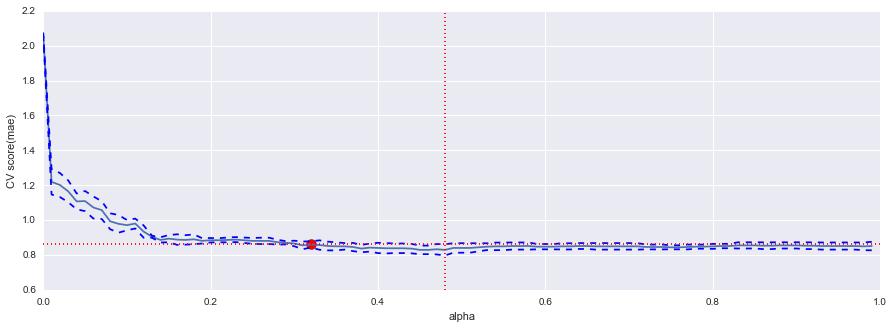

In [4]:
cv = StratifiedKFold(y, n_folds=3, random_state=0)

i_range = []
score_range = []
sigma = []

for a in np.arange(0, 1, 0.01):
    mnb = MultinomialNB(alpha = a)
    #print('alpha :',a)
    
    scores = np.zeros(3)
    
    for i, (train_idx, test_idx) in enumerate(cv):
        X_train = cat_X.ix[train_idx]
        y_train = y[train_idx]
        X_test = cat_X.ix[test_idx]
        y_test = y[test_idx]
        
        mnb.fit(X_train, y_train)
        y_pred = mnb.predict(X_test)
        
        scores[i] = mean_absolute_error(y_test, y_pred)
    #print(' mean :', round(np.mean(scores), 4),"   ", scores)
    #print('--------------------------------------------------------')
    #scores
    #np.mean(scores)
    
    i_range.append(a)
    score_range.append(np.mean(scores))
    sigma.append(np.std(scores))

best_idx = np.argmin(score_range)
best_alpha = i_range[best_idx]
best_score = score_range[best_idx]
sigma

plt.figure(figsize = (15, 5))
plt.plot(i_range, score_range)
plt.plot(i_range, np.array(score_range) + sigma, 'b--')
plt.plot(i_range, np.array(score_range) - sigma, 'b--')
plt.axhline(best_score + sigma[best_idx], linestyle=':', color='r')
plt.axvline(best_alpha, linestyle=':', color='r')

def find_nearest(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx

plt.scatter(i_range[find_nearest(score_range, best_score+sigma[best_idx])], best_score+sigma[best_idx], s=100, c='red')
plt.xlim(0, 1)
plt.ylabel('CV score(mae)')
plt.xlabel('alpha')

print("best alpha : ", best_alpha)
print("best score : ", best_score)
print('   1-sigma : ', round(sigma[best_idx], 4))
print('='*25)
print("sub_opt score : ", round(best_score + sigma[best_idx], 4))
print("sub_opt alpha : ", round(   i_range[find_nearest(score_range, best_score+sigma[best_idx])]          , 4))

### b-1) cv=5, 0~10까지 0.01 step size

best alpha :  1.1
best score :  0.81195644698
   1-sigma :  0.0461
sub_opt score :  0.8581
sub_opt alpha :  0.16


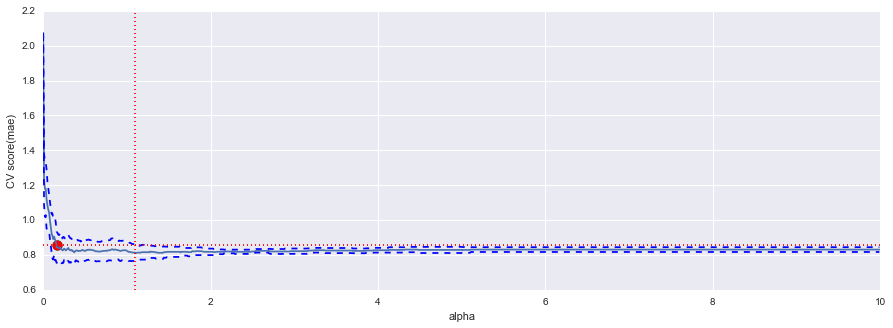

In [5]:
cv = StratifiedKFold(y, n_folds=5, random_state=51)

i_range = []
score_range = []
sigma = []

for a in np.arange(0, 10, 0.01):
    mnb = MultinomialNB(alpha = a)
    #print('alpha :',a)
    
    scores = np.zeros(5)
    
    for i, (train_idx, test_idx) in enumerate(cv):
        X_train = cat_X.ix[train_idx]
        y_train = y[train_idx]
        X_test = cat_X.ix[test_idx]
        y_test = y[test_idx]
        
        mnb.fit(X_train, y_train)
        y_pred = mnb.predict(X_test)
        
        scores[i] = mean_absolute_error(y_test, y_pred)
    #print(' mean :', round(np.mean(scores), 4),"   ", scores)
    #print('--------------------------------------------------------')
    #scores
    #np.mean(scores)
    
    i_range.append(a)
    score_range.append(np.mean(scores))
    sigma.append(np.std(scores))

best_idx = np.argmin(score_range)
best_alpha = i_range[best_idx]
best_score = score_range[best_idx]
sigma

plt.figure(figsize = (15, 5))
plt.plot(i_range, score_range)
plt.plot(i_range, np.array(score_range) + sigma, 'b--')
plt.plot(i_range, np.array(score_range) - sigma, 'b--')
plt.axhline(best_score + sigma[best_idx], linestyle=':', color='r')
plt.axvline(best_alpha, linestyle=':', color='r')

def find_nearest(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx

plt.scatter(i_range[find_nearest(score_range, best_score+sigma[best_idx])], best_score+sigma[best_idx], s=100, c='red')
plt.xlim(0, 10)
plt.ylabel('CV score(mae)')
plt.xlabel('alpha')

print("best alpha : ", best_alpha)
print("best score : ", best_score)
print('   1-sigma : ', round(sigma[best_idx], 4))
print('='*25)
print("sub_opt score : ", round(best_score + sigma[best_idx], 4))
print("sub_opt alpha : ", round(   i_range[find_nearest(score_range, best_score+sigma[best_idx])]          , 4))

### b-2) cv=5, 0~1까지 0.01 step size

best alpha :  0.37
best score :  0.814371496451
   1-sigma :  0.063
sub_opt score :  0.8773
sub_opt alpha :  0.15


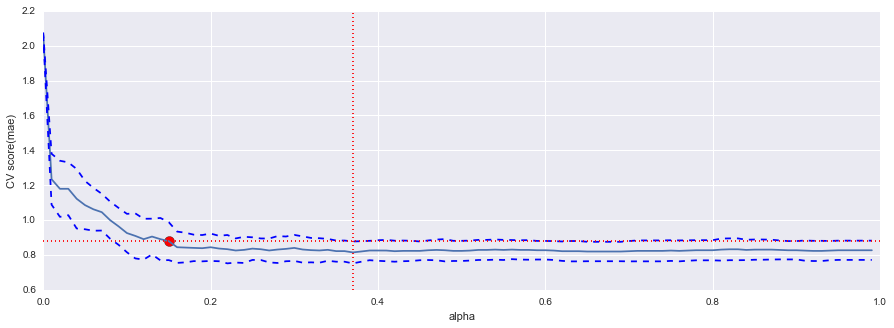

In [30]:
cv = StratifiedKFold(y, n_folds=5, random_state=51)

i_range = []
score_range = []
sigma = []

for a in np.arange(0, 1, 0.01):
    mnb = MultinomialNB(alpha = a)
    #print('alpha :',a)
    
    scores = np.zeros(5)
    
    for i, (train_idx, test_idx) in enumerate(cv):
        X_train = cat_X.ix[train_idx]
        y_train = y[train_idx]
        X_test = cat_X.ix[test_idx]
        y_test = y[test_idx]
        
        mnb.fit(X_train, y_train)
        y_pred = mnb.predict(X_test)
        
        scores[i] = mean_absolute_error(y_test, y_pred)
    #print(' mean :', round(np.mean(scores), 4),"   ", scores)
    #print('--------------------------------------------------------')
    #scores
    #np.mean(scores)
    
    i_range.append(a)
    score_range.append(np.mean(scores))
    sigma.append(np.std(scores))

best_idx = np.argmin(score_range)
best_alpha = i_range[best_idx]
best_score = score_range[best_idx]
sigma

plt.figure(figsize = (15, 5))
plt.plot(i_range, score_range)
plt.plot(i_range, np.array(score_range) + sigma, 'b--')
plt.plot(i_range, np.array(score_range) - sigma, 'b--')
plt.axhline(best_score + sigma[best_idx], linestyle=':', color='r')
plt.axvline(best_alpha, linestyle=':', color='r')

def find_nearest(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx

plt.scatter(i_range[find_nearest(score_range, best_score+sigma[best_idx])], best_score+sigma[best_idx], s=100, c='red')
plt.xlim(0, 1)
plt.ylabel('CV score(mae)')
plt.xlabel('alpha')

print("best alpha : ", best_alpha)
print("best score : ", best_score)
print('   1-sigma : ', round(sigma[best_idx], 4))
print('='*25)
print("sub_opt score : ", round(best_score + sigma[best_idx], 4))
print("sub_opt alpha : ", round(   i_range[find_nearest(score_range, best_score+sigma[best_idx])]          , 4))